In [4]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [6]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [7]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [9]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [10]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [11]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [16]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [17]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [18]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [23]:
# Read the ride data file
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [19]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [20]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [21]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [25]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12,33,Urban


In [33]:
# Create DataFrames based on each type of city. 
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [32]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head(10)

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
East Kaylahaven    29
Erikaland          12
Grahamburgh        25
Huntermouth        24
Hurleymouth        28
Name: ride_id, dtype: int64

In [34]:
# Create the suburban count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head(10)

city
Barronchester      16
Bethanyland        18
Brandonfort        19
Colemanland        22
Davidfurt          17
East Aaronbury      9
East Danielview    17
East Kentstad      13
East Marymouth     27
Grayville          15
Name: ride_id, dtype: int64

In [55]:
# Create the rural count.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head(10)

city
Bradshawfurt       10
Garzaport           3
Harringtonfort      6
Jessicaport         6
Lake Jamie          6
Lake Latoyabury    11
Michaelberg        12
New Ryantown        6
Newtonview          4
North Holly         9
Name: ride_id, dtype: int64

In [36]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head(10)

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
East Kaylahaven    23.757931
Erikaland          24.906667
Grahamburgh        25.221200
Huntermouth        28.993750
Hurleymouth        25.891429
Name: fare, dtype: float64

In [37]:
# Get average fare for each city in suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head(10)

city
Barronchester      36.422500
Bethanyland        32.956111
Brandonfort        35.437368
Colemanland        30.894545
Davidfurt          31.995882
East Aaronbury     25.661111
East Danielview    31.560588
East Kentstad      29.823077
East Marymouth     30.835185
Grayville          27.763333
Name: fare, dtype: float64

In [54]:
# Get average fare for each city in rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head(10)

city
Bradshawfurt       40.064000
Garzaport          24.123333
Harringtonfort     33.470000
Jessicaport        36.013333
Lake Jamie         34.358333
Lake Latoyabury    26.061818
Michaelberg        34.997500
New Ryantown       43.278333
Newtonview         36.745000
North Holly        29.130000
Name: fare, dtype: float64

In [41]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head(10)

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
East Kaylahaven    65.0
Erikaland          37.0
Grahamburgh        61.0
Huntermouth        37.0
Hurleymouth        36.0
Name: driver_count, dtype: float64

In [42]:
# Get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head(10)

city
Barronchester      11.0
Bethanyland        22.0
Brandonfort        10.0
Colemanland        23.0
Davidfurt          23.0
East Aaronbury      7.0
East Danielview    22.0
East Kentstad      20.0
East Marymouth      5.0
Grayville           2.0
Name: driver_count, dtype: float64

In [43]:
# Get the average number of drivers for each rural city.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head(10)

city
Bradshawfurt       7.0
Garzaport          7.0
Harringtonfort     4.0
Jessicaport        1.0
Lake Jamie         4.0
Lake Latoyabury    2.0
Michaelberg        6.0
New Ryantown       2.0
Newtonview         1.0
North Holly        8.0
Name: driver_count, dtype: float64

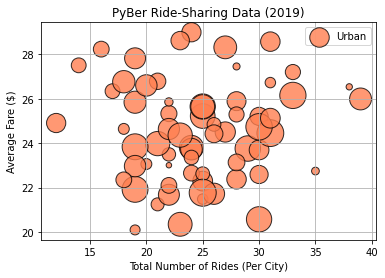

In [46]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

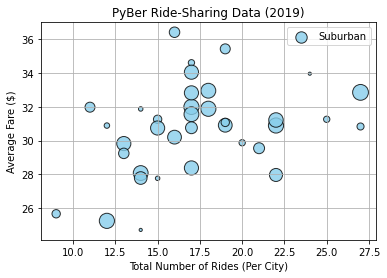

In [53]:
 # Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

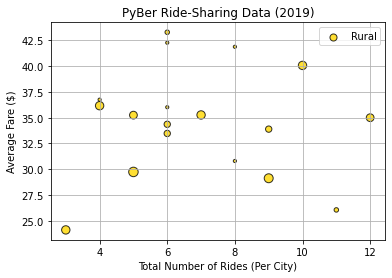

In [56]:
 # Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

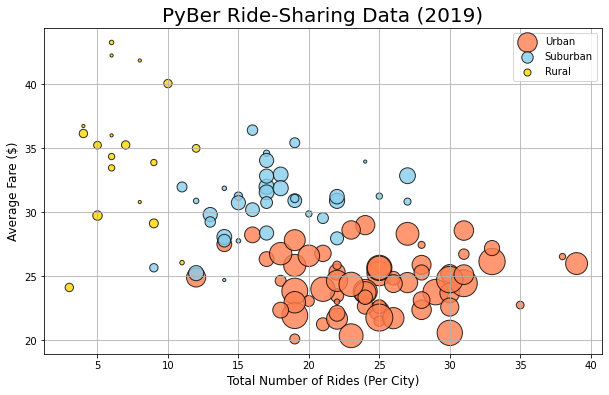

In [58]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()

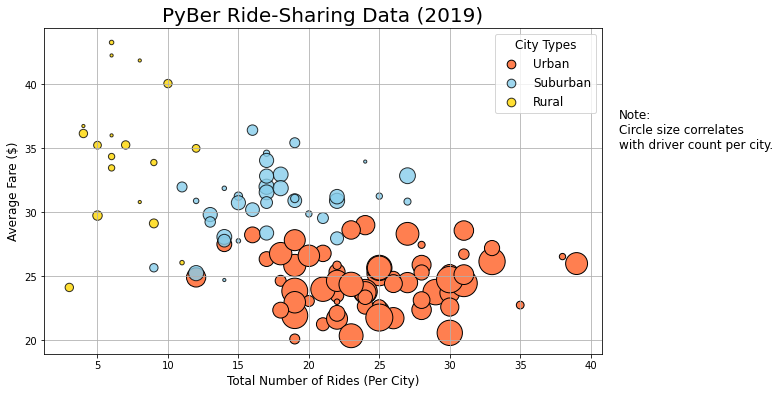

In [61]:
# Build the scatter plots for each city types
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",scatterpoints=1, 
                  loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.",fontsize=12)

# Save Figure
plt.savefig("analysis/Fig1.png")
# Show plot
plt.show()

In [67]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [68]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [69]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [70]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [71]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [72]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [73]:
# Calculate the mean of the ride count for each city type. 
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [74]:
# Calculate the median of the ride count for each city type. 
urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [75]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [76]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [77]:
# Calculate the mode of the ride count for the rural cities.
rural_ride_count.mode()

0    6
Name: ride_id, dtype: int64

In [78]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [79]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [80]:
# Demonstrate calculating measures of central tendency for the fare for the suburban cites
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride count for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride count for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride count for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride count for suburban trips is 17.36.
The median for the ride count for suburban trips is 17.0.
The mode for the ride count for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [81]:
# Demonstrate calculating measures of central tendency for the fare for the rural cites
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride count for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride count for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride count for rural trips is {mode_rural_ride_count}.")

The mean for the ride count for rural trips is 6.94.
The median for the ride count for rural trips is 6.0.
The mode for the ride count for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [92]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head(10)

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
5     9.52
6    43.25
7    35.98
8    35.09
9    42.81
Name: fare, dtype: float64

In [83]:
round(urban_fares.mean(),2), urban_fares.median(), urban_fares.mode()

(24.53,
 24.64,
 0    22.86
 Name: fare, dtype: float64)

In [84]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [89]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head(10)

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
1630    37.60
1631    20.44
1632    46.51
1633    44.74
1634    28.02
Name: fare, dtype: float64

In [86]:
# Demonstrate calculating measures of central tendency for the fare for the urban cites
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is {mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_avg_fare)
print(f"The median fare price for suburban trips is {median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_avg_fare)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is 30.97.
The median fare price for suburban trips is 30.90.
The mode fare price for suburban trips is ModeResult(mode=array([24.70428571]), count=array([1])).


In [93]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head(10)

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
2255    45.31
2256    36.16
2257    42.68
2258    13.46
2259    39.46
Name: fare, dtype: float64

In [94]:
# Demonstrate calculating measures of central tendency for the fare for the urban cites
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is {mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is {median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is 34.62.
The median fare price for rural trips is 37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [95]:
# Get the driver count data from the urban cities. 
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head(10)

0     5
1    72
2    57
3    34
4    46
5    10
6    44
7    21
8     4
9    33
Name: driver_count, dtype: int64

In [96]:
 # Calculate the measures of central tendency for the number of drivers for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean for the number of drivers for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median for the number of drivers for urban trips is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for the number of drivers for urban trips is {mode_urban_drivers}.")

The mean for the number of drivers for urban trips is 36.68.
The median for the number of drivers for urban trips is 37.00.
The mode for the number of drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [97]:
#  Get the driver count data from the suburban cities. 
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head(10)

1625    11
1626    20
1627    22
1628    19
1629    12
1630     5
1631    17
1632     4
1633    25
1634    10
Name: driver_count, dtype: int64

In [98]:
# Calculate the measures of central tendency for the number of drivers for the suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean for the number of drivers for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median for the number of drivers for suburban trips is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for the number of drivers for suburban trips is {mode_suburban_drivers}.")

The mean for the number of drivers for suburban trips is 13.71.
The median for the number of drivers for suburban trips is 16.00.
The mode for the number of drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [99]:
# Get the driver count data from the rural cities. 
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head(10)

2250    9
2251    8
2252    6
2253    2
2254    2
2255    1
2256    7
2257    2
2258    2
2259    8
Name: driver_count, dtype: int64

In [100]:
# Calculate the measures of central tendency for the number of drivers for the rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean for the number of drivers for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median for the number of drivers for rural trips is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for the number of drivers for rural trips is {mode_rural_drivers}.")

The mean for the number of drivers for rural trips is 4.30.
The median for the number of drivers for rural trips is 4.00.
The mode for the number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


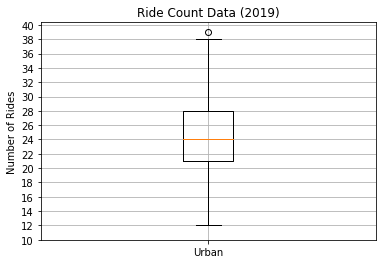

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [102]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()
# Add the summary statistics.
urban_ride_count.describe()

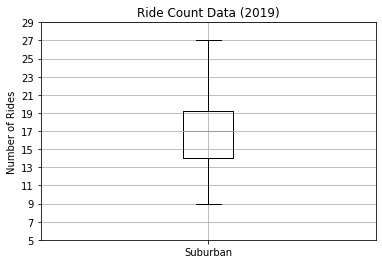

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [103]:
 # Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(5, 31, step=2.0))
ax.grid()
plt.show()
# Add the summary statistics.
suburban_ride_count.describe()

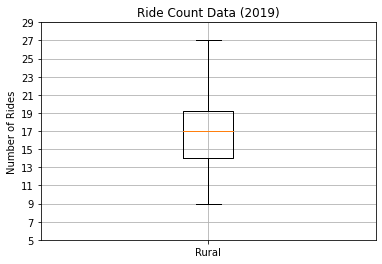

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [104]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(5, 30, step=2.0))
ax.grid()
plt.show()
# Add the summary statistics.
rural_ride_count.describe()

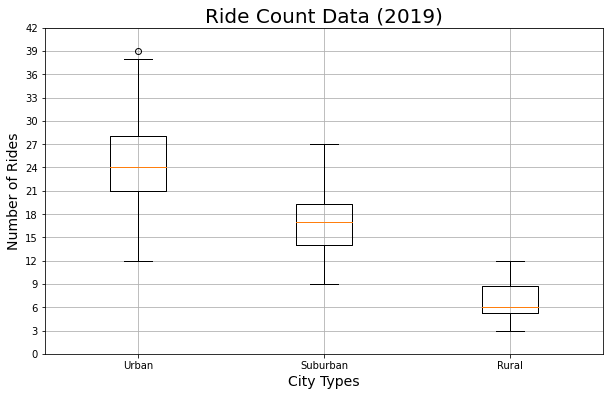

In [105]:
 # Add all ride count box plots to the same graph. 
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save Figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [106]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [107]:
 # Get the sum of all the fares. 
total_fares =  pyber_data_df["fare"].sum()
total_fares

63538.64

In [109]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

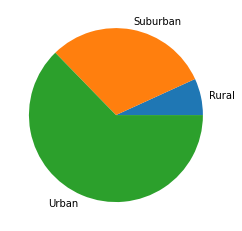

In [110]:
# Build Pie Chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"])
plt.show()

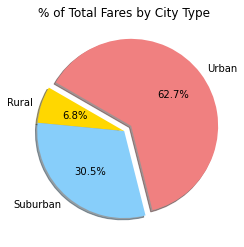

In [111]:
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()

In [ ]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size form 10 to 14.
mpl.rcParams['font.size'] = 14 
#  plt.rcParams['font.size'] = 14 can be used too. 
# Save Figure
plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()